In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os



#path = 'C:\\Users\Aichou Diallo\Dropbox\Project-1\Aissa'
file = '../cleaned_stock_market.csv'
df = pd.read_csv(file)


df.head(20)




,symbol,year,month,close
0,AAAU,2020,7,17.709999
1,AAAU,2020,7,17.680000
2,AAAU,2020,6,17.780001
3,AAAU,2020,6,17.680000
4,AAAU,2020,6,17.670000
5,AAAU,2020,6,17.590000
6,AAAU,2020,6,17.610001
7,AAAU,2020,6,17.660000
8,AAAU,2020,6,17.500000
9,AAAU,2020,6,17.400000


In [23]:
df['year'].value_counts()

2019    217469
2018    198425
2017    182812
2016    171609
2015    161539
2020    116721
Name: year, dtype: int64

In [28]:
#Average close per year and by symbol

avg_close=df.groupby(["symbol","year"]).mean()["close"]
top_ten=avg_close.sort_values(ascending=False)[0:10]
avg=pd.DataFrame(avg_close)
avg.head(50)
# top_ten

close
symbol year            
AAAU   2018   12.171579
       2019   13.920317
       2020   16.474961
AACG   2019    1.931699
       2020    1.025039
AADR   2015   38.491495
       2016   38.953017
       2017   50.131394
       2018   54.197490
       2019   47.813492
       2020   48.989291
AAL    2015   45.122103
       2016   38.183849
       2017   47.490717
       2018   42.801952
       2019   30.879326
       2020   17.341260
AAMC   2015  127.048135
       2016   20.638968
       2017   79.672500
       2018   59.604256
       2019   19.511446
       2020   15.810574
AAME   2015    4.009426
       2016    3.970946
       2017    3.622696
       2018    2.892035
       2019    2.420871
       2020    2.027373
AAN    2015   32.269762
       2016   24.925794
       2017   36.577649
       2018   45.544143
       2019   58.283532
       2020   39.863937
AAOI   2015   16.208810
       2016   16.445853
       2017   53.216574
       2018   31.517709
       2019   11.577639
       2020    9.861271
AAON   2015   22.658810
       2016   27.268056
       2017   34.992630
       2018   35.963864
       2019   46.079484
       2020   51.363543
AAP    2015  163.647262
       2016  155.488135
       2017  122.574861

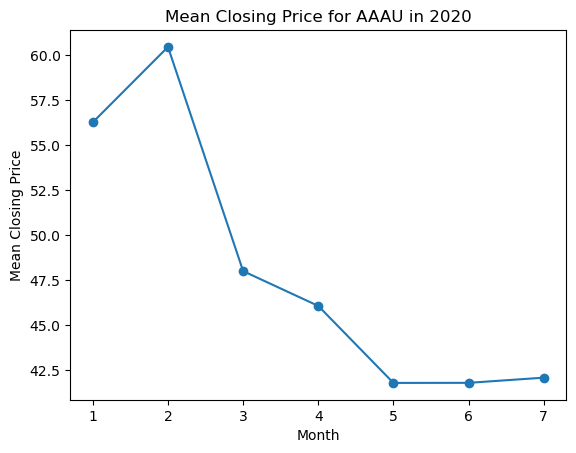

In [20]:
import matplotlib.pyplot as plt

# Filter the data to include only data for the year 2020
df_2020 = df[df['year'] == 2020]

# Calculate the mean closing price for each month in 2020
mean_closing_price_2020 = df_2020.groupby('month')['close'].mean()

# Plot the mean closing price for each month in 2020
plt.plot(mean_closing_price_2020.index, mean_closing_price_2020.values, '-o')
plt.xlabel('Month')
plt.ylabel('Mean Closing Price')
plt.title('Mean Closing Price for AAAU in 2020')
plt.show()


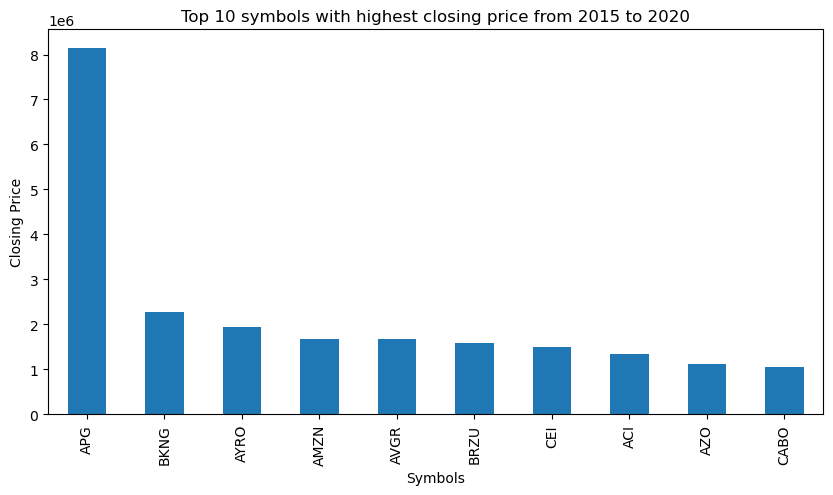

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data into a pandas dataframe
df = pd.read_csv(file)

# group the data by symbol and sum the close column
symbol_closing_price = df.groupby(['symbol'])['close'].sum()

# sort the symbols by closing price in descending order
symbol_closing_price_sorted = symbol_closing_price.sort_values(ascending=False)

# get the top 10 symbols
top_10_symbols = symbol_closing_price_sorted[:10]

# plot the bar chart
top_10_symbols.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 symbols with highest closing price from 2015 to 2020")
plt.xlabel("Symbols")
plt.ylabel("Closing Price")
plt.show()


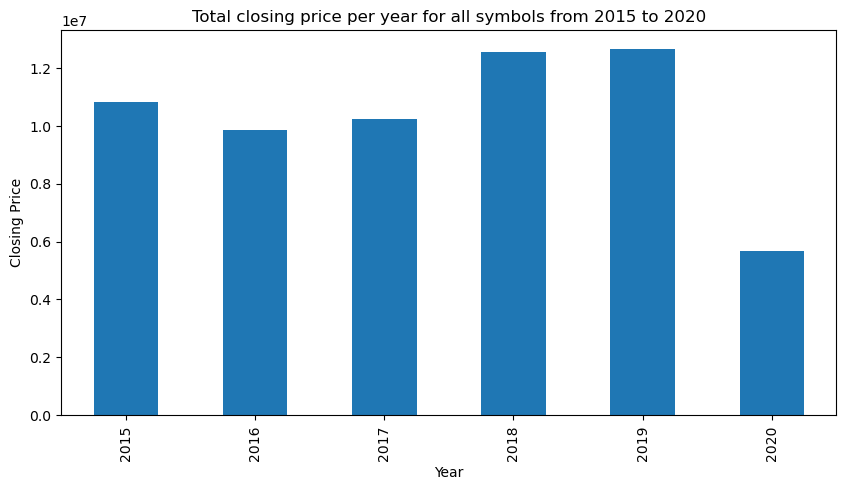

In [52]:
# read the data into a pandas dataframe
df = pd.read_csv(file)

# group the data by year and sum the close column
yearly_closing_price = df.groupby(['year'])['close'].sum()

# plot the bar chart
yearly_closing_price.plot(kind='bar', figsize=(10,5))
plt.title("Total closing price per year for all symbols from 2015 to 2020")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.show()

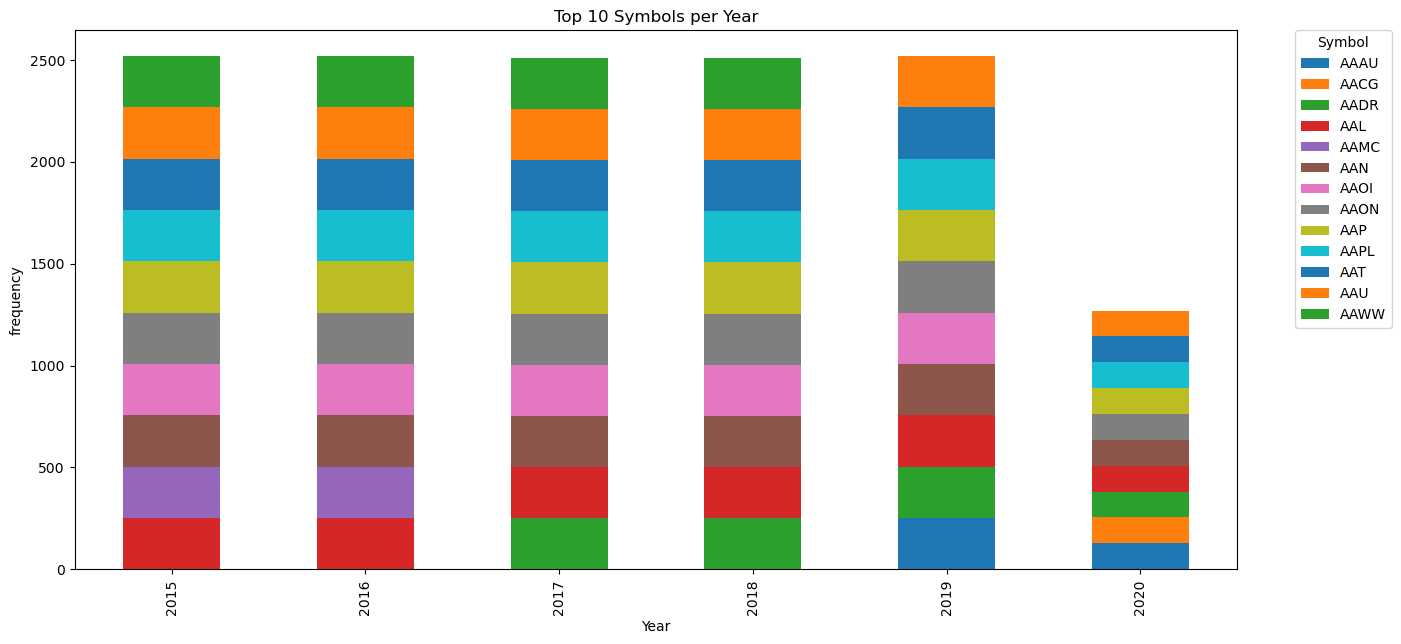

In [67]:
#groups the data by year and symbol, and finds the top 10 symbols for each year based on the count of the symbol.


top_10_symbols = df.groupby(['year','symbol']).size().reset_index(name='counts')
top_10_symbols = top_10_symbols.sort_values(['year','counts'],ascending=[True,False]).groupby('year').head(10)
top_10_symbols = top_10_symbols.pivot(index='year', columns='symbol', values='counts')
top_10_symbols.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title('Top 10 Symbols per Year')
plt.xlabel('Year')
plt.ylabel('frequency')
plt.legend(title='Symbol',bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

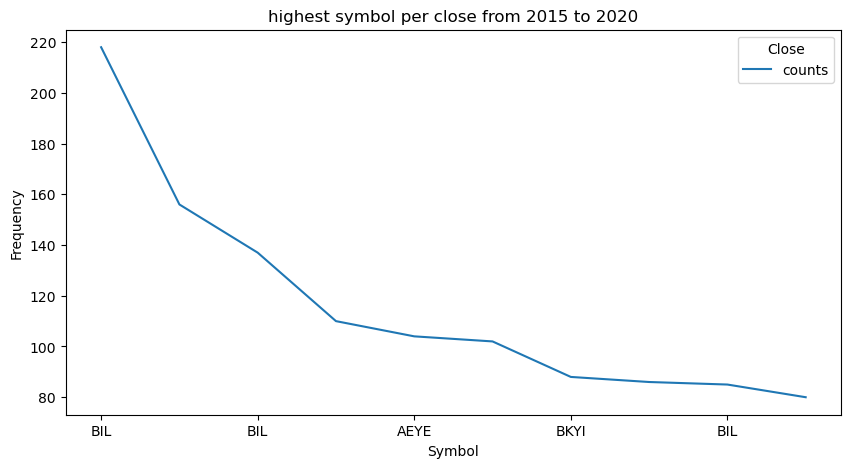

In [77]:
#Symbols with the highest count of close from 2015 to 2020

#group by symbol and close

highest_symbols = df.groupby(['symbol','close'])['year'].count().reset_index(name='counts')
highest_symbols = highest_symbols.sort_values(by = 'counts',ascending=False).head(10)

#create the line chart
highest_symbols.plot(kind='line', x='symbol', y='counts',title='symbol with largest count of close from 2015 to 2020',figsize=(10,5))
plt.xlabel('Symbol')
plt.ylabel('Frequency')
plt.legend(title='Close')
plt.show()

In [34]:
# read the data into a pandas dataframe
df = pd.read_csv(file)

# group the data by 'symbol' and 'year' and calculate the mean of the 'close' column
df_grouped = df.groupby(['symbol', 'year'])['close'].mean()

# reset the index and rename the 'close' column to 'total_closing_price'
df_grouped = df_grouped.reset_index().rename(columns={'close': 'total_closing_price'})

# print the result
print(df)


        symbol  year  month      close
0         AAAU  2020      7  17.709999
1         AAAU  2020      7  17.680000
2         AAAU  2020      6  17.780001
3         AAAU  2020      6  17.680000
4         AAAU  2020      6  17.670000
...        ...   ...    ...        ...
1048570   CEQP  2016      3   9.030000
1048571   CEQP  2016      3   8.850000
1048572   CEQP  2016      3   9.100000
1048573   CEQP  2016      3   8.720000
1048574   CEQP  2016      3   9.400000

[1048575 rows x 4 columns]


In [53]:

# read the data into a pandas dataframe
df = pd.read_csv(file)

# group the data by 'symbol' and 'year' and calculate the max of the 'close' column
df_grouped = df.groupby(['symbol'])['close'].max()

# reset the index
df_grouped = df_grouped.reset_index()

# sort the dataframe by the 'close' column in descending order
df_grouped = df_grouped.sort_values(by='close', ascending=False)

# select the first row, which is the highest symbol per close
highest_symbol = df_grouped.iloc[0]['symbol']

# print the result
print(highest_symbol)

AYRO


In [54]:
import pandas as pd

# read the data into a pandas dataframe
df = pd.read_csv(file)

# extract the rows where symbol == 'AYRO'
ayro_data = df[df['symbol'] == 'AYRO']

# calculate the sum of the 'close' column
ayro_total_closing_price = ayro_data['close'].sum()

# set the display options to show the full decimal places
pd.options.display.float_format = '{:.10f}'.format

# print the result
print(f"AYRO total closing price: {ayro_total_closing_price}")

AYRO total closing price: 1944913.390469087


In [35]:
# read the data into a pandas dataframe
df = pd.read_csv(file)

# group the data by symbol and sum the close column
symbol_closing_price = df.groupby(['symbol'])['close'].sum()

# sort the symbols by closing price in descending order
symbol_closing_price_sorted = symbol_closing_price.sort_values(ascending=False)

# get the top 10 symbols
top_10_symbols = symbol_closing_price_sorted[:10]

# print the result
print("Top 10 symbols with highest closing price from 2015 to 2020:")
print(top_10_symbols)

AYRO


In [29]:
import pandas as pd

# read the data into a pandas dataframe
df = pd.read_csv(file)

# group the data by 'year' and calculate the sum of the 'close' column
df_grouped = df.groupby(['year'])['close'].sum()

# reset the index and rename the 'close' column to 'total_closing_price'
df_grouped = df_grouped.reset_index().rename(columns={'close': 'total_closing_price'})

# print the result
print(df_grouped)

# group the data by 'symbol' and 'year' and calculate the sum of the 'close' column
df_grouped_by_symbol = df.groupby(['symbol', 'year'])['close'].sum()

# reset the index
df_grouped_by_symbol = df_grouped_by_symbol.reset_index()

# print the result
print(df_grouped_by_symbol)

   year  total_closing_price
0  2015         1.080905e+07
1  2016         9.871084e+06
2  2017         1.023989e+07
3  2018         1.255965e+07
4  2019         1.267351e+07
5  2020         5.685295e+06
     symbol  year        close
0      AAAU  2018  1156.300004
1      AAAU  2019  3507.919998
2      AAAU  2020  2092.320002
3      AACG  2019   397.929999
4      AACG  2020   130.179999
...     ...   ...          ...
4984   CEQP  2016  4037.079998
4985   CEQP  2017  6232.950003
4986   CEQP  2018  7941.719994
4987   CEQP  2019  8659.160000
4988   CEQP  2020  2085.969995

[4989 rows x 3 columns]


In [32]:
import pandas as pd

# read the data into a pandas dataframe
df = pd.read_csv(file)

# filter the data to only include rows with year == 2020
df_2020 = df[df['year'] == 2020]

# group the data by 'symbol' and calculate the sum of the 'close' column
df_grouped = df_2020.groupby('symbol')['close'].sum()

# reset the index and rename the 'close' column to 'total_closing_price'
df_grouped = df_grouped.reset_index().rename(columns={'close': 'total_closing_price'})

# print the result
print(df_grouped)

    symbol  total_closing_price
0     AAAU          2092.320002
1     AACG           130.179999
2     AADR          6221.639999
3      AAL          2202.340001
4     AAMC          1928.889996
..     ...                  ...
971   CENT          4022.609991
972  CENTA          3764.669994
973   CENX           693.689998
974    CEO         16161.600005
975   CEQP          2085.969995

[976 rows x 2 columns]


In [40]:
# read the data into a pandas dataframe
df = pd.read_csv(file)

# group the data by symbol and sum the close column
symbol_closing_price = df.groupby(['symbol'])['close'].sum()

# sort the symbols by closing price in descending order
symbol_closing_price_sorted = symbol_closing_price.sort_values(ascending=False)

# get the top 10 symbols
top_10_symbols = symbol_closing_price_sorted[:10]

# print the result
print("Top 10 symbols with highest closing price from 2015 to 2020:")
print(top_10_symbols)

Top 10 symbols with highest closing price from 2015 to 2020:
symbol
APG    8151803.5299968859
BKNG   2271853.7519418001
AYRO   1944913.3904690871
AMZN   1680700.1903615000
AVGR   1677040.3760003250
BRZU   1584389.6060424601
CEI    1507067.8499998420
ACI    1337702.2288228101
AZO    1111728.1296051000
CABO   1060782.3612656000
Name: close, dtype: float64


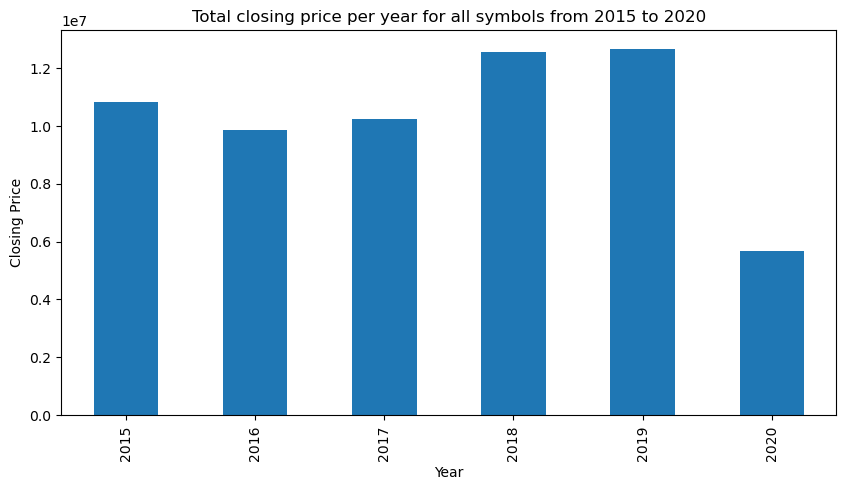